In [ ]:
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

In [ ]:
%matplotlib inline

In [1]:
%run initialize_notebook.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from helpers import eimod, lcahelp
eimod.init()

Geomatcher: Used 'AU' for 'AUS'
Geomatcher: Used 'CA' for 'CAN'
Geomatcher: Used 'HM' for 'HMD'
Geomatcher: Used 'NZ' for 'NZL'
Geomatcher: Used 'PM' for 'SPM'
Geomatcher: Used 'CN' for 'CHN'
Geomatcher: Used 'HK' for 'HKG'
Geomatcher: Used 'MO' for 'MAC'
Geomatcher: Used 'TW' for 'TWN'
Geomatcher: Used 'AX' for 'ALA'
Geomatcher: Used 'AT' for 'AUT'
Geomatcher: Used 'BE' for 'BEL'
Geomatcher: Used 'BG' for 'BGR'
Geomatcher: Used 'CY' for 'CYP'
Geomatcher: Used 'CZ' for 'CZE'
Geomatcher: Used 'DE' for 'DEU'
Geomatcher: Used 'DK' for 'DNK'
Geomatcher: Used 'ES' for 'ESP'
Geomatcher: Used 'EE' for 'EST'
Geomatcher: Used 'FI' for 'FIN'
Geomatcher: Used 'FR' for 'FRA'
Geomatcher: Used 'FO' for 'FRO'
Geomatcher: Used 'GB' for 'GBR'
Geomatcher: Used 'GI' for 'GIB'
Geomatcher: Used 'GR' for 'GRC'
Geomatcher: Used 'HR' for 'HRV'
Geomatcher: Used 'HU' for 'HUN'
Geomatcher: Used 'IM' for 'IMN'
Geomatcher: Used 'IE' for 'IRL'
Geomatcher: Used 'IT' for 'ITA'
Geomatcher: Used 'LT' for 'LTU'
Geomatch

In [3]:
from wurst import searching as ws
from wurst.ecoinvent import filters

In [4]:
databases

Databases dictionary with 21 objects, including:
	Carma CCS
	biosphere3
	coal_exit_INDC_2020
	coal_exit_INDC_2030
	coal_exit_INDC_2040
	coal_exit_INDC_2050
	coal_exit_RCP26_2020
	coal_exit_RCP26_2030
	coal_exit_RCP26_2040
	coal_exit_RCP26_2050
Use `list(this object)` to get the complete list.

In [24]:
database_dict = {}
database_dict['ecoinvent_added_technologies'] = {'year' : 2015 , 'scenario' : 'ecoinvent'}

for year in [2015, 2030, 2050]:
    for scenario in ['Ref', 'INDC', 'coal_exit', 'RCP26']:
        if year == 2015 and scenario != 'Ref':
            continue
        db_name = 'coal_exit_' + scenario + '_' + str(year)
        database_dict[db_name] = {'year' : year , 'scenario' : scenario}



In [25]:
database_dict

{'ecoinvent_added_technologies': {'year': 2015, 'scenario': 'ecoinvent'},
 'coal_exit_Ref_2015': {'year': 2015, 'scenario': 'Ref'},
 'coal_exit_Ref_2030': {'year': 2030, 'scenario': 'Ref'},
 'coal_exit_INDC_2030': {'year': 2030, 'scenario': 'INDC'},
 'coal_exit_coal_exit_2030': {'year': 2030, 'scenario': 'coal_exit'},
 'coal_exit_RCP26_2030': {'year': 2030, 'scenario': 'RCP26'},
 'coal_exit_Ref_2050': {'year': 2050, 'scenario': 'Ref'},
 'coal_exit_INDC_2050': {'year': 2050, 'scenario': 'INDC'},
 'coal_exit_coal_exit_2050': {'year': 2050, 'scenario': 'coal_exit'},
 'coal_exit_RCP26_2050': {'year': 2050, 'scenario': 'RCP26'}}

In [12]:
db_order = ['ecoinvent_added_technologies',
            'coal_exit_Ref_2015',

            'coal_exit_Ref_2030',
            'coal_exit_INDC_2030',
            'coal_exit_coal_exit_2030',
            'coal_exit_RCP26_2030',

            'coal_exit_Ref_2050',
            'coal_exit_INDC_2050',
            'coal_exit_coal_exit_2050',
            'coal_exit_RCP26_2050'
            ]

In [13]:
db_tuples = []
for db in db_order:  
    db_tuples.append((database_dict[db]['year'], database_dict[db]['scenario']))

Let's create a dictionary of all remind and ecoinvent locations:

In [16]:
location_dict = {}
for ds in Database('coal_exit_Ref_2015'):
    if ds['location'] not in location_dict.keys():
        location_dict[ds['location']] = (eimod.ecoinvent_to_remind_locations(ds['location'], fixnames=False), ds['location'])

In [17]:
location_dict

{'RoW': (['OAS',
   'LAM',
   'EUR',
   'CAZ',
   'USA',
   'NEU',
   'MEA',
   'REF',
   'JPN',
   'CHA',
   'SSA',
   'IND'],
  'RoW'),
 'GLO': (['OAS',
   'LAM',
   'EUR',
   'CAZ',
   'USA',
   'NEU',
   'MEA',
   'REF',
   'JPN',
   'CHA',
   'SSA',
   'IND'],
  'GLO'),
 'RER': (['EUR', 'NEU', 'REF', 'LAM'], 'RER'),
 'RME': (['MEA'], 'RME'),
 'MT': (['EUR'], 'MT'),
 'ME': (['NEU'], 'ME'),
 'SE': (['EUR'], 'SE'),
 'PE': (['LAM'], 'PE'),
 'SD': (['MEA'], 'SD'),
 'RO': (['EUR'], 'RO'),
 'CH': (['NEU'], 'CH'),
 'ZA': (['SSA'], 'ZA'),
 'CA-MB': (['CAZ'], 'CA-MB'),
 'Europe without Switzerland': (['EUR', 'NEU', 'REF', 'LAM'],
  'Europe without Switzerland'),
 'CA-NT': (['CAZ'], 'CA-NT'),
 'PT': (['EUR'], 'PT'),
 'HT': (['LAM'], 'HT'),
 'EE': (['EUR'], 'EE'),
 'CA-QC': (['CAZ'], 'CA-QC'),
 'IN-North-eastern grid': (['IND'], 'IN-North-eastern grid'),
 'US-ASCC': (['USA'], 'US-ASCC'),
 'IN-MH': (['IND'], 'IN-MH'),
 'HU': (['EUR'], 'HU'),
 'SK': (['EUR'], 'SK'),
 'MK': (['NEU'], 'MK'),
 'PH

# Electricity markets

In [18]:
electricity_markets = {}
electricity_markets_LCIA= {}

for db_name in database_dict:

    electricity_markets[db_name] = [x for x in ws.get_many(Database(db_name), *[*eimod.electricity_market_filter_high_voltage, ws.exclude(ws.contains('name', 'Swiss Federal Railways')),
                                                                                ws.exclude(ws.contains('name', 'label-certified'))])]

    electricity_markets_LCIA[(database_dict[db_name]['year'], database_dict[db_name]['scenario'])] = lcahelp.LCA_to_df(electricity_markets[db_name], cats = ['CC'])


CC


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


CC


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


CC


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


CC


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


CC


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


CC


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


CC


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


CC


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


CC


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


CC


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


CC


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


CC


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


CC


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


CC


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


CC


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


CC


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


CC


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


CC


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


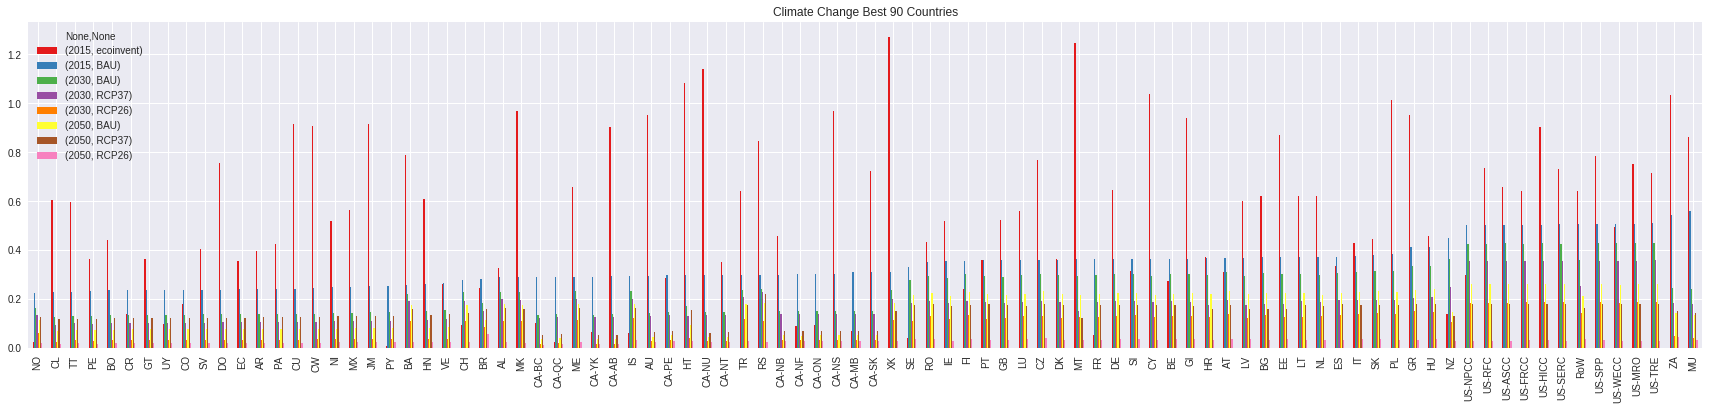

In [39]:
pd \
    .concat(electricity_markets_LCIA)['CC'] \
        .unstack(level = [0,1]) \
        .rename(index=lambda el: el[1]) \
        .sort_values(by = (2015, 'BAU')) \
    .head(90)[db_tuples] \
    .plot.bar(figsize = (30,6), title = lcahelp.titles['CC'] + " Best 90 Countries")

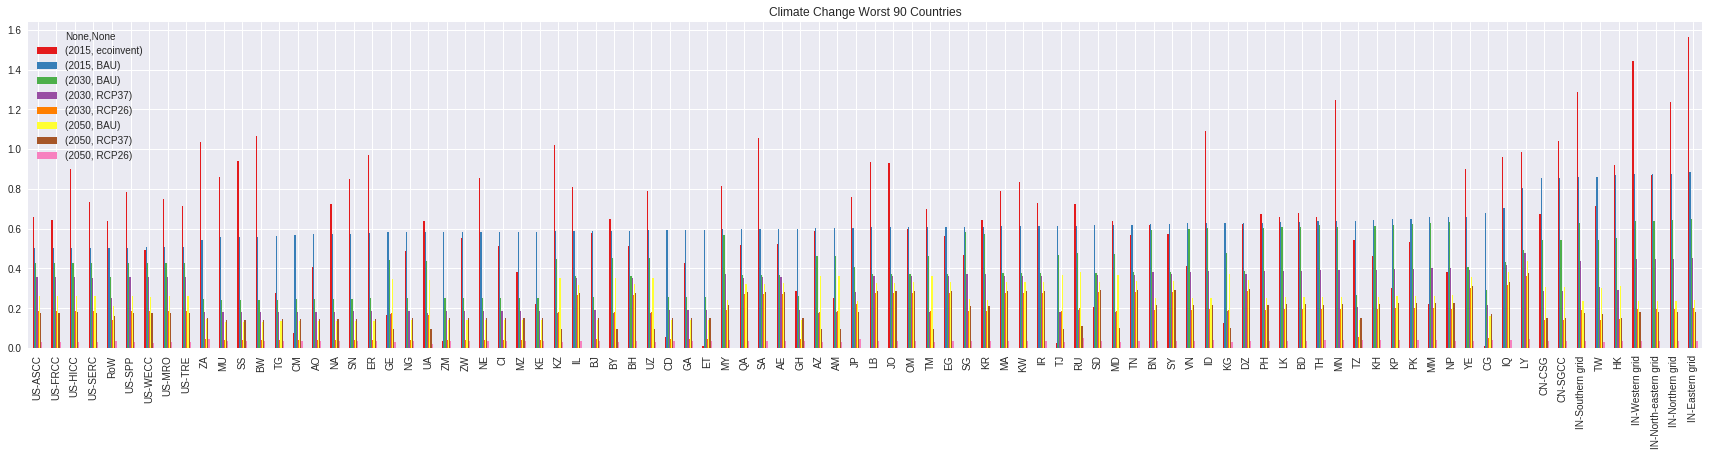

In [38]:
pd \
    .concat(electricity_markets_LCIA)['CC'] \
        .unstack(level = [0,1]) \
        .rename(index=lambda el: el[1]) \
        .sort_values(by = (2015, 'BAU')) \
    .tail(90)[db_tuples] \
    .plot.bar(figsize = (30,6), title = lcahelp.titles['CC'] + " Worst 90 Countries")

We see consistency in the REMIND results for different regions, but the ecoinvent results are quite different than the REMIND 2015 numbers. This is due mostly to the different regional splits - ie Switerland and Norway are given "dirty" European average electricity.

Let's do the same, but group by remind location:

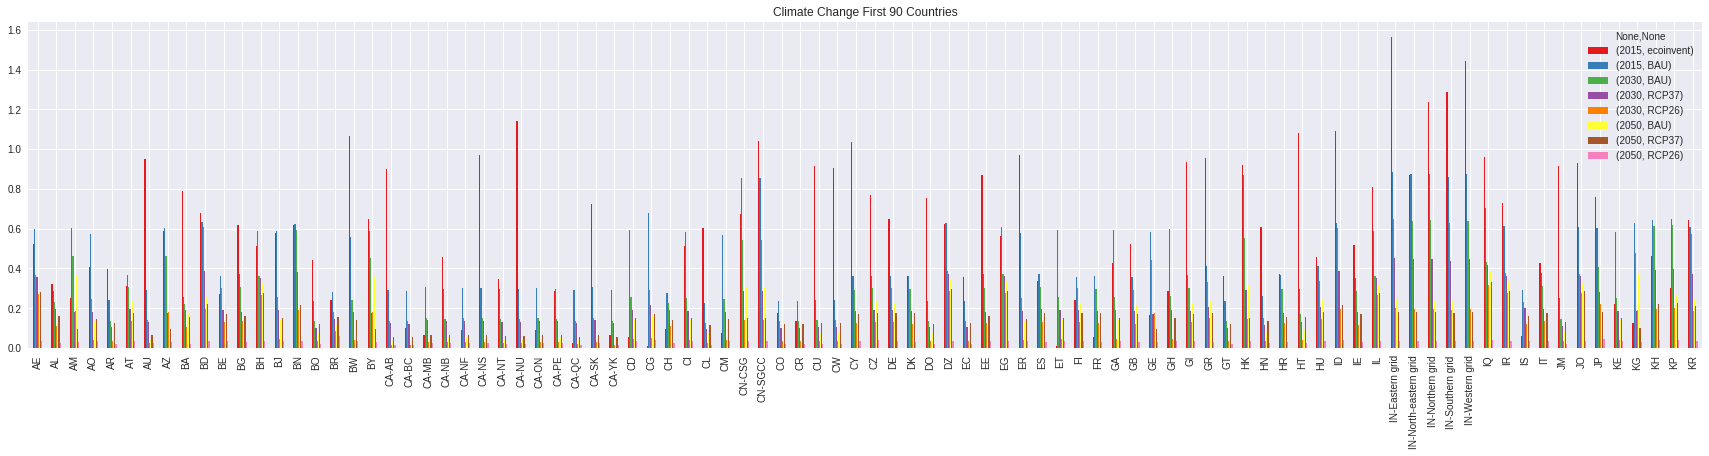

In [40]:
pd \
    .concat(electricity_markets_LCIA)['CC'] \
    .unstack(level = [0,1]) \
    .rename(index=lambda el: el[1]) \
    .sort_index() \
    .head(90)[db_tuples] \
    .plot.bar(figsize = (30,6), title = lcahelp.titles['CC'] + " First 90 Countries")

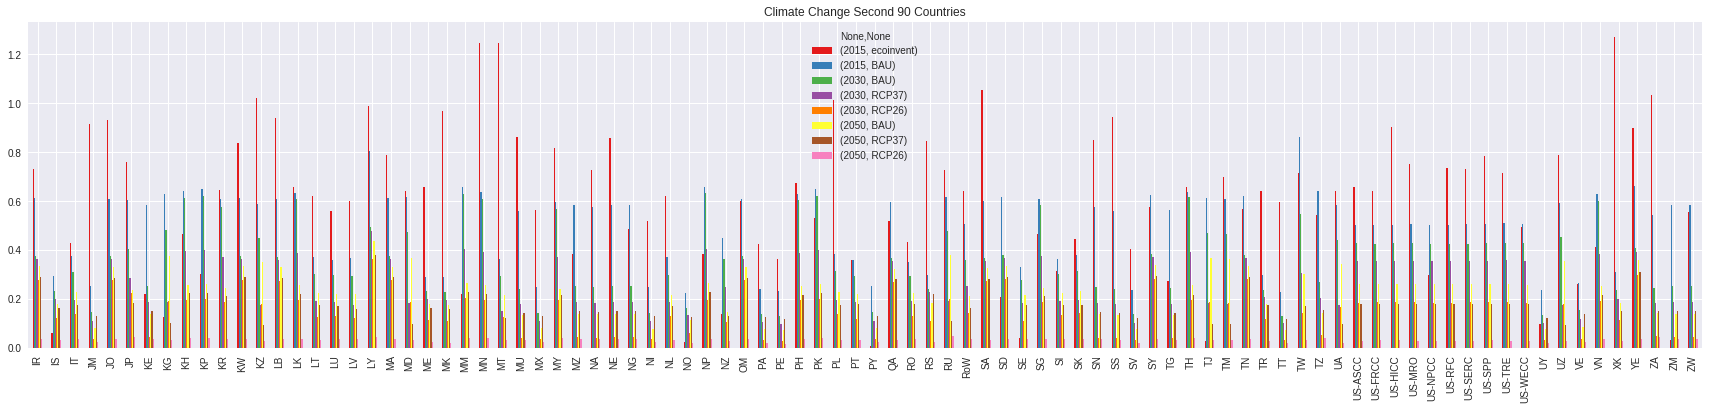

In [42]:
pd \
    .concat(electricity_markets_LCIA)['CC'] \
    .unstack(level = [0,1]) \
    .rename(index=lambda el: el[1]) \
    .sort_index() \
    .tail(90)[db_tuples] \
    .plot.bar(figsize = (30,6), title = lcahelp.titles['CC'] + " Second 90 Countries")

The Remind modified results seem to be quite similar for different remind regions - which is what we would expect. 

# market groups

In [20]:
[act for act in Database("coal_exit_Ref_2015") if act["name"].startswith("market group for electricity, high voltage")]

['market group for electricity, high voltage' (kilowatt hour, RNA, None),
 'market group for electricity, high voltage' (kilowatt hour, Canada without Quebec, None),
 'market group for electricity, high voltage' (kilowatt hour, RME, None),
 'market group for electricity, high voltage' (kilowatt hour, CN, None),
 'market group for electricity, high voltage' (kilowatt hour, RAF, None),
 'market group for electricity, high voltage' (kilowatt hour, Europe without Switzerland, None),
 'market group for electricity, high voltage' (kilowatt hour, UCTE, None),
 'market group for electricity, high voltage' (kilowatt hour, RLA, None),
 'market group for electricity, high voltage' (kilowatt hour, ENTSO-E, None),
 'market group for electricity, high voltage' (kilowatt hour, RER, None),
 'market group for electricity, high voltage' (kilowatt hour, IN, None),
 'market group for electricity, high voltage' (kilowatt hour, GLO, None),
 'market group for electricity, high voltage' (kilowatt hour, RAS, N

In [27]:
electricity_market_groups = {}
electricity_market_groups_LCIA= {}

for db_name in database_dict:
    electricity_market_groups[db_name] = [
        x for x in ws.get_many(Database(db_name), 
                               *[equals('name', 'market group for electricity, high voltage')])]
    electricity_market_groups_LCIA[(database_dict[db_name]['year'], 
                                    database_dict[db_name]['scenario'])] = lcahelp.LCA_to_df(
        electricity_market_groups[db_name], cats = ['CC', 'R_Total', 'PMF'])

CC


0% [###############] 100% | ETA: 00:00:00

R_Total



Total time elapsed: 00:00:00
0% [###############] 100% | ETA: 00:00:00

PMF



Total time elapsed: 00:00:00
0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


CC


0% [###############] 100% | ETA: 00:00:00

R_Total



Total time elapsed: 00:00:00
0% [###############] 100% | ETA: 00:00:00

PMF



Total time elapsed: 00:00:00
0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


CC


0% [###############] 100% | ETA: 00:00:00

R_Total



Total time elapsed: 00:00:00
0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


PMF


0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


CC


0% [###############] 100% | ETA: 00:00:00

R_Total



Total time elapsed: 00:00:00
0% [###############] 100% | ETA: 00:00:00

PMF



Total time elapsed: 00:00:00
0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


CC


0% [###############] 100% | ETA: 00:00:00

R_Total



Total time elapsed: 00:00:00
0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


PMF


0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


CC


0% [###############] 100% | ETA: 00:00:00

R_Total



Total time elapsed: 00:00:00
0% [###############] 100% | ETA: 00:00:00

PMF



Total time elapsed: 00:00:00
0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


CC


0% [###############] 100% | ETA: 00:00:00

R_Total



Total time elapsed: 00:00:00
0% [###############] 100% | ETA: 00:00:00

PMF



Total time elapsed: 00:00:00
0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


CC


0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


R_Total


0% [###############] 100% | ETA: 00:00:00

PMF



Total time elapsed: 00:00:00
0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


CC


0% [###############] 100% | ETA: 00:00:00

R_Total



Total time elapsed: 00:00:00
0% [###############] 100% | ETA: 00:00:00

PMF



Total time elapsed: 00:00:00
0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


CC


0% [###############] 100% | ETA: 00:00:00

R_Total



Total time elapsed: 00:00:00
0% [###############] 100% | ETA: 00:00:00

PMF



Total time elapsed: 00:00:00
0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


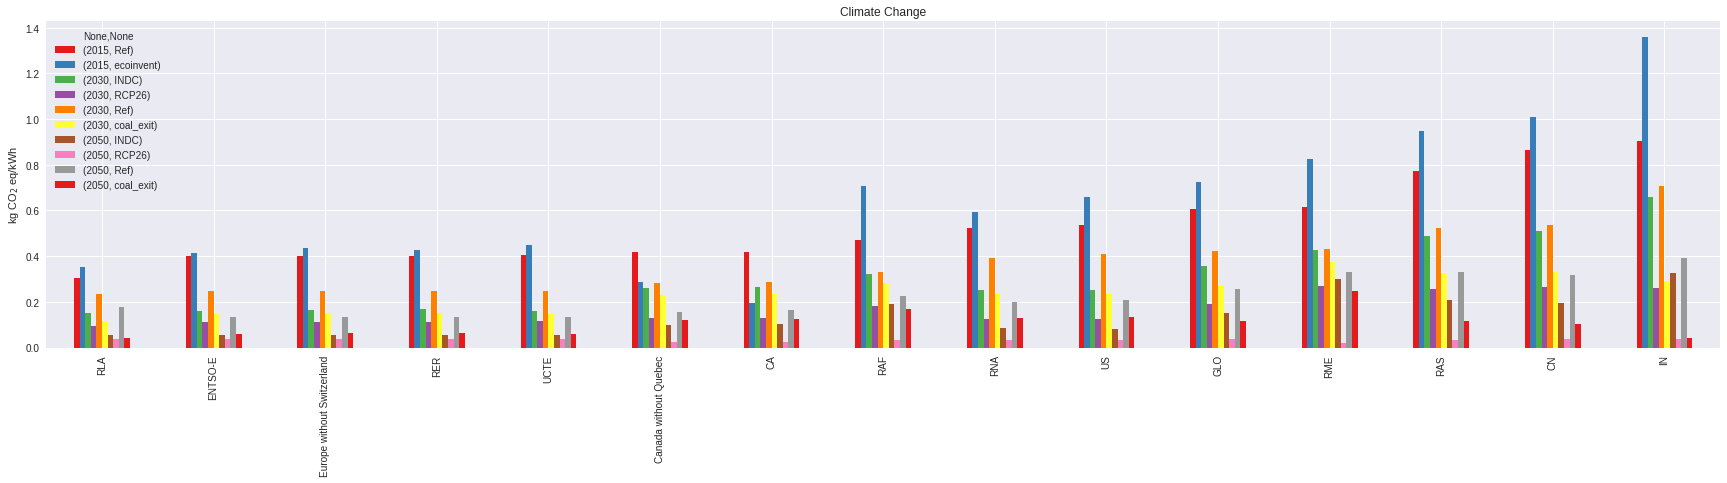

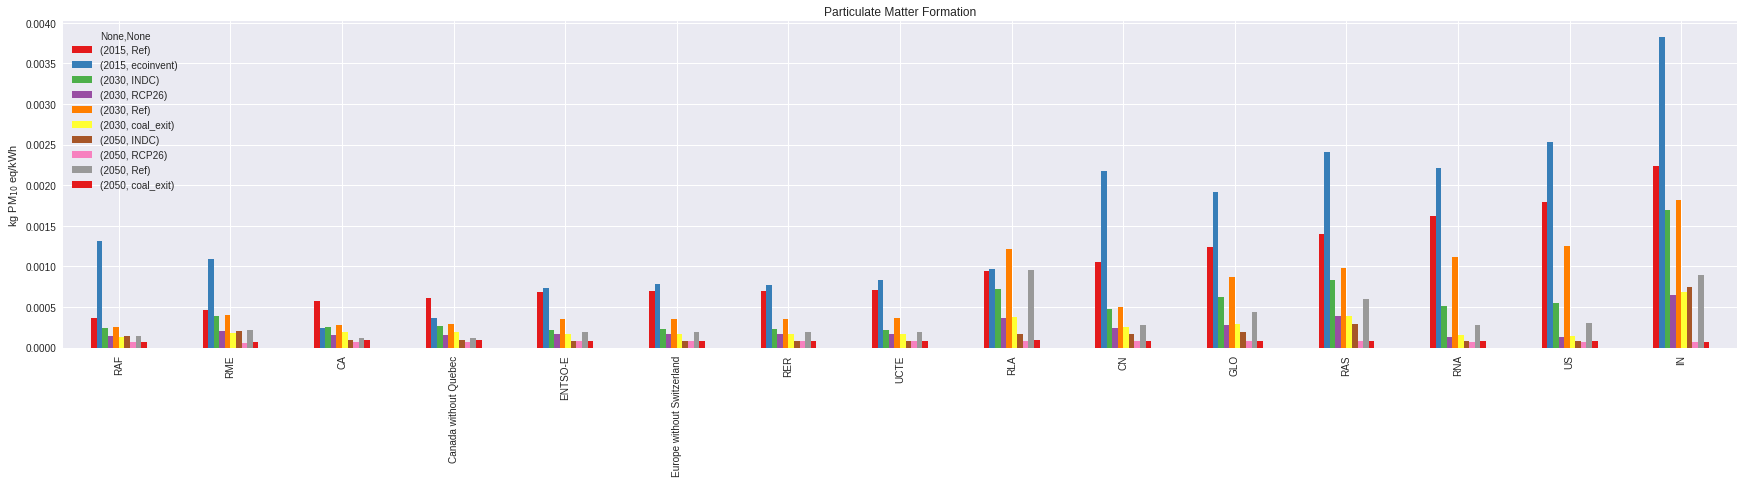

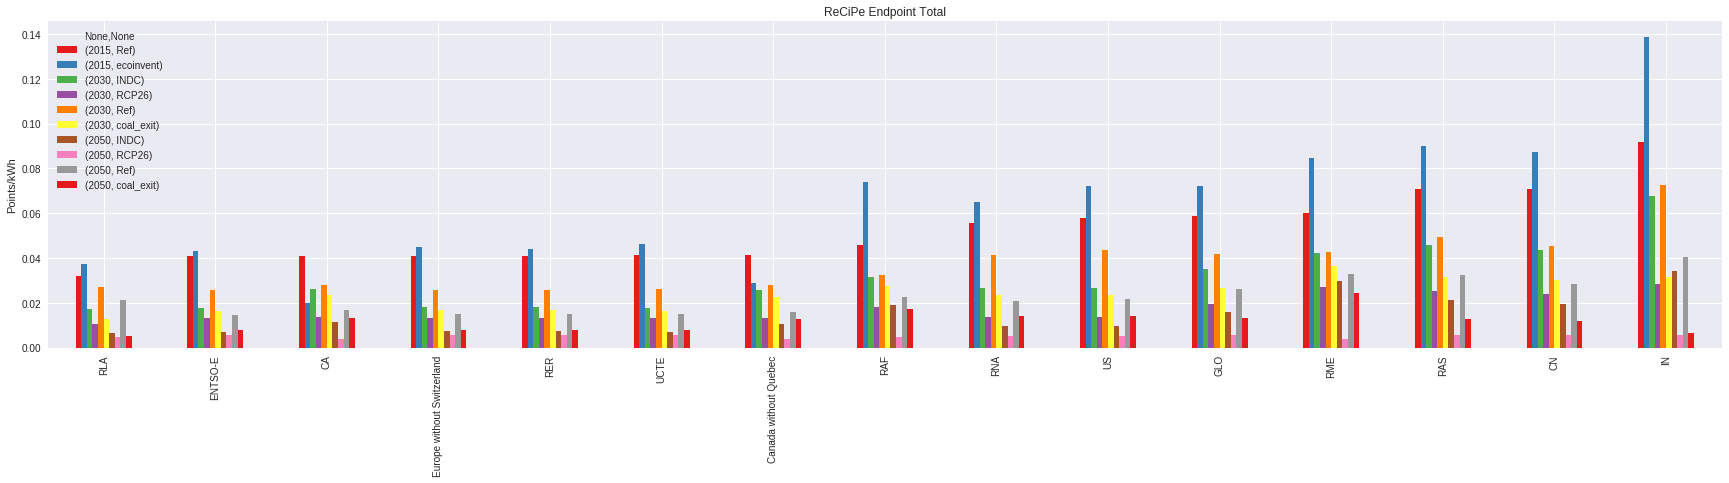

In [28]:
for cat in ['CC', 'PMF', 'R_Total']:
    ax = pd \
        .concat(electricity_market_groups_LCIA)[cat] \
        .unstack(level = [0,1]) \
        .rename(index=lambda el: el[1]) \
        .sort_values(by = (2015, 'Ref')) \
        .plot.bar(figsize = (30,6), title = lcahelp.titles[cat])
    ax.set_ylabel(lcahelp.units[cat] + "/kWh")

#  Coal:

In [ ]:
coal_datasets = {}
coal_LCIA= {}

for db_name in database_dict:

    coal_datasets[db_name] = [x for x in get_many(Database(db_name), *filters.coal_electricity)]
    lca = LCA({coal_datasets[db_name][0]: 1}, method=lcia_methods['CC'])
    lca.lci()
    lca.lcia()
    lca.score
    coal_LCIA[(database_dict[db_name]['year'], database_dict[db_name]['scenario'])] = LCA_to_df(coal_datasets[db_name], cats = ['CC', 'PMF', 'POF', 'R_Total'])

In [ ]:
for cat in coal_LCIA[(2015,'BAU')].columns:
    ax = pd.concat(coal_LCIA)[cat].unstack(level = [0,1]).loc['electricity production, hard coal'].sort_values(by = (2015, 'BAU')).rename(index = location_dict)[db_tuples].plot.bar(figsize = (30,6), title = titles[cat])
    ax.set_ylabel(units[cat] + "/kWh")

In [ ]:
for cat in coal_LCIA[(2015,'BAU')].columns:
    ax = pd.concat(coal_LCIA)[cat].unstack(level = [0,1]).loc['electricity production, lignite'].sort_values(by = (2015, 'BAU')).rename(index = location_dict)[db_tuples].plot.bar(figsize = (30,6), title = titles[cat])
    ax.set_ylabel(units[cat] + "/kWh")

Okay, PMF and POF are getting way better, but we didn't change the PM emissions using the remind data (only scaled by efficiency). What's causing the PMF and POF impacts in hard coal electricity?

In [ ]:
coal_contribution_LCIA = {}

for db_name in database_dict:

    lca = LCA({coal_datasets[db_name][0]: 1}, method=lcia_methods['CC'])
    lca.lci()
    lca.lcia()
    lca.score
    coal_contribution_LCIA[(database_dict[db_name]['year'], database_dict[db_name]['scenario'])] = contribution_LCA_to_df(coal_datasets[db_name], cats = ['CC', 'PMF', 'POF', 'R_Total'])

In [ ]:
for cat in ['PMF', 'POF']:
    for db_name in database_dict:
        ax = group_into_other(coal_contribution_LCIA[(database_dict[db_name]['year'], database_dict[db_name]['scenario'])].loc['electricity production, hard coal'].dropna(
            how = 'all', axis=1)).rename(index = location_dict)[cat].sort_index().plot.bar(stacked=True,figsize = (30,6), title = db_name + " " + titles[cat])
        ax.set_ylabel(units[cat] + "/kWh")

In [ ]:
for cat in ['PMF', 'POF']:
    for db_name in database_dict:
        ax = group_into_other(coal_contribution_LCIA[(database_dict[db_name]['year'], database_dict[db_name]['scenario'])].loc['electricity production, lignite'].dropna(
            how = 'all', axis=1)).rename(index = location_dict)[cat].sort_index().plot.bar(stacked=True,figsize = (30,6), title = db_name + " " + titles[cat])
        ax.set_ylabel(units[cat] + "/kWh")

We see that not modifying the PM emissions is definitely not a good solution. We should find a way to include this! Everything else seems to make sense.

# Carma datasets

In [ ]:
carma_datasets = {}
carma_LCIA= {}

for db_name in database_dict:
    
    carma_datasets[db_name] = [x for x in Database(db_name) if x['name'] in eimod.carma_electricity_ds_name_dict.keys() ]
    lca = LCA({carma_datasets[db_name][0]: 1}, method=lcia_methods['CC'])
    lca.lci()
    lca.lcia()
    lca.score
    carma_LCIA[(database_dict[db_name]['year'], database_dict[db_name]['scenario'])] = LCA_to_df(carma_datasets[db_name], cats = ['CC', 'PMF', 'POF', 'R_Total'])

In [ ]:
for cat in carma_LCIA[(2015, 'BAU')].columns:
    fig, axes=plt.subplots(nrows=1, ncols=len(database_dict.keys()), figsize=(30,6), sharey=True, sharex = True)
    st=plt.suptitle(titles[cat], fontsize='12')
    st.set_y(1.05)
    plt.subplots_adjust(top=1)

    for i, db_name in enumerate(database_dict):
        ax = carma_LCIA[(database_dict[db_name]['year'], database_dict[db_name]['scenario'])][cat].plot.barh(ax = axes[i], title = db_name)
    plt.tight_layout()
    plt.show()


We need to remember that the carma datasets were made roughly 5 years ago and were modelling power plants in 2025. They likely just expect high improvements in emission control technology. I don't think that we made a mistake when implementing the data.

# Gas

In [ ]:
gas_cc_datasets = {}
gas_cc_LCIA= {}

for db_name in database_dict:

    gas_cc_datasets[db_name] = [x for x in get_many(Database(db_name), *[*filters.gas_combined_cycle_electricity + eimod.generic_excludes + eimod.no_imports])]
    lca = LCA({gas_cc_datasets[db_name][0]: 1}, method=lcia_methods['CC'])
    lca.lci()
    lca.lcia()
    lca.score
    gas_cc_LCIA[(database_dict[db_name]['year'], database_dict[db_name]['scenario'])] = LCA_to_df(gas_cc_datasets[db_name], cats = ['CC', 'PMF', 'POF', 'R_Total'])

In [ ]:
for cat in gas_cc_LCIA[(2015,'BAU')].columns:
    ax = pd.concat(gas_cc_LCIA)[cat].unstack(level = [0,1]).loc['electricity production, natural gas, combined cycle power plant'].sort_values(by = (2015, 'BAU')).rename(index = location_dict)[db_tuples].plot.bar(figsize = (30,6), title = titles[cat])
    ax.set_ylabel(units[cat] + "/kWh")

## Gas open cycle

In [ ]:
gas_oc_datasets = {}
gas_oc_LCIA= {}

for db_name in database_dict:

    gas_oc_datasets[db_name] = [x for x in ws.get_many(Database(db_name), *[*eimod.gas_open_cycle_electricity + eimod.generic_excludes + eimod.no_imports])]
    lca = LCA({gas_oc_datasets[db_name][0]: 1}, method=lcia_methods['CC'])
    lca.lci()
    lca.lcia()
    lca.score
    gas_oc_LCIA[(database_dict[db_name]['year'], database_dict[db_name]['scenario'])] = LCA_to_df(gas_oc_datasets[db_name], cats = ['CC', 'PMF', 'POF', 'R_Total'])

In [ ]:
for cat in gas_oc_LCIA[(2015,'BAU')].columns:
    ax = pd.concat(gas_oc_LCIA)[cat].unstack(level = [0,1]).loc['electricity production, natural gas, conventional power plant'].sort_values(by = (2015, 'BAU')).rename(
        index = location_dict)[db_tuples].plot.bar(figsize = (30,6), title = titles[cat])
    ax.set_ylabel(units[cat] + "/kWh")

## Gas CHP

In [ ]:
gas_CHP_datasets = {}
gas_CHP_LCIA= {}

for db_name in database_dict:

    gas_CHP_datasets[db_name] = [x for x in ws.get_many(Database(db_name), *[*filters.gas_chp_electricity + eimod.generic_excludes + eimod.no_imports])]
    lca = LCA({gas_CHP_datasets[db_name][0]: 1}, method=lcia_methods['CC'])
    lca.lci()
    lca.lcia()
    lca.score
    gas_CHP_LCIA[(database_dict[db_name]['year'], database_dict[db_name]['scenario'])] = LCA_to_df(gas_CHP_datasets[db_name], cats = ['CC', 'PMF', 'POF', 'R_Total'])

In [ ]:
for cat in gas_CHP_LCIA[(2015,'BAU')].columns:
    ax = pd.concat(gas_CHP_LCIA)[cat].unstack(level = [0,1])[db_tuples].plot.bar(figsize = (30,6), title = titles[cat])
    ax.set_ylabel(units[cat] + "/kWh")

# Biomass

In [ ]:
biomass_datasets = {}
biomass_LCIA= {}

for db_name in database_dict:

    biomass_datasets[db_name] = [x for x in ws.get_many(Database(db_name), *[*eimod.biomass_chp_electricity + eimod.generic_excludes + eimod.no_imports])]
    lca = LCA({biomass_datasets[db_name][0]: 1}, method=lcia_methods['CC'])
    lca.lci()
    lca.lcia()
    lca.score
    biomass_LCIA[(database_dict[db_name]['year'], database_dict[db_name]['scenario'])] = LCA_to_df(biomass_datasets[db_name], cats = ['CC', 'PMF', 'POF', 'R_Total'])

In [ ]:
for cat in biomass_LCIA[(2015,'BAU')].columns:
    ax = pd.concat(biomass_LCIA)[cat].unstack(level = [0,1])[db_tuples].plot.bar(figsize = (30,6), title = titles[cat])
    ax.set_ylabel(units[cat] + "/kWh")

# Oil

In [ ]:
oil_datasets = {}
oil_LCIA= {}

for db_name in database_dict:

    oil_datasets[db_name] = [x for x in ws.get_many(Database(db_name), *[*filters.oil_open_cycle_electricity + eimod.generic_excludes + eimod.no_imports])]
    lca = LCA({oil_datasets[db_name][0]: 1}, method=lcia_methods['CC'])
    lca.lci()
    lca.lcia()
    lca.score
    oil_LCIA[(database_dict[db_name]['year'], database_dict[db_name]['scenario'])] = LCA_to_df(oil_datasets[db_name], cats = ['CC', 'PMF', 'POF', 'R_Total'])

In [ ]:
for cat in oil_LCIA[(2015,'BAU')].columns:
    ax = pd.concat(oil_LCIA)[cat].unstack(level = [0,1])[db_tuples].plot.bar(figsize = (30,6), title = titles[cat])
    ax.set_ylabel(units[cat] + "/kWh")